Load the _Wine Quality Dataset (Combined)_ data.

In [1]:
import pandas as pd

data = pd.read_csv("../WineQuality.csv")

Sample the data.

In [2]:
data

,Unnamed: 0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Type
0,2732,7.4,0.170,0.29,1.4,0.047,23.0,107.0,0.99390,3.52,0.65,10.4,6,White Wine
1,2607,5.3,0.310,0.38,10.5,0.031,53.0,140.0,0.99321,3.34,0.46,11.7,6,White Wine
2,1653,4.7,0.145,0.29,1.0,0.042,35.0,90.0,0.99080,3.76,0.49,11.3,6,White Wine
3,3264,6.9,0.260,0.29,4.2,0.043,33.0,114.0,0.99020,3.16,0.31,12.5,6,White Wine
4,4931,6.4,0.450,0.07,1.1,0.030,10.0,131.0,0.99050,2.97,0.28,10.8,5,White Wine
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32480,2838,5.0,0.255,0.22,2.7,0.043,46.0,153.0,0.99238,3.75,0.76,11.3,6,White Wine
32481,6414,6.6,0.360,0.52,11.3,0.046,8.0,110.0,0.99660,3.07,0.46,9.4,5,White Wine
32482,1126,6.3,0.200,0.24,1.7,0.052,36.0,135.0,0.99374,3.80,0.66,10.8,6,White Wine
32483,2924,6.2,0.200,0.33,5.4,0.028,21.0,75.0,0.99012,3.36,0.41,13.5,7,White Wine


Retain the useful 11 features and isolate quality alone as a label, then split them both into training/test subsets.

In [3]:
x_data = data.drop(data.columns[0], axis=1).drop(["quality","Type"], axis=1)
y_data = data.quality

Split the samples into 80/20 train/test subsets.

In [4]:
train_size = int(len(x_data) * 0.8)
x_train = x_data[:train_size]
y_train = y_data[:train_size]
x_test = x_data[train_size:]
y_test = y_data[train_size:]

print("Using {} samples for training and {} samples for training.\n".format(len(x_train), len(x_test)) +
        "Total of {} records, dataset size is {} rows.\n".format(len(x_train) + len(x_test), len(x_data)) +
        "Training set has a shape of {}, labels have a shape of {}".format(x_data.shape, y_data.shape))

Using 25988 samples for training and 6497 samples for training.
Total of 32485 records, dataset size is 32485 rows.
Training set has a shape of (32485, 11), labels have a shape of (32485,)


Create a sequential model definition, one deep RELU intermediate layer with softmax output and 10 possible values.

In [5]:
import keras
from keras import layers

classifier_init = keras.Sequential([
    layers.Dense(11, activation="relu"),
    layers.Dense(44, activation="relu"),
    layers.Dense(10, activation="softmax")
])

Compile the model with adam optimiser and sparse categorical cross-entropy loss function. Track accuracy.

In [6]:
classifier_init.compile(optimizer="adam",
                   loss="sparse_categorical_crossentropy",
                   metrics=["accuracy"])

2025-04-16 20:56:16.639749: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Max
2025-04-16 20:56:16.639783: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 64.00 GB
2025-04-16 20:56:16.639792: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 24.00 GB
I0000 00:00:1744826176.639810 59696050 pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
I0000 00:00:1744826176.639835 59696050 pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Fit the model across 20 epochs with batches of 1000 samples, using a further 80/20 split for training and validation subsets.

In [7]:
epochs_init = 20
history_init = classifier_init.fit(x_train, y_train,
                         epochs=epochs_init, batch_size=1000,
                         validation_split=0.2)

Epoch 1/20


2025-04-16 20:56:17.150147: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


21/21 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.0138 - loss: 32.4910 - val_accuracy: 0.3705 - val_loss: 8.4827
Epoch 2/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.3566 - loss: 7.4516 - val_accuracy: 0.3228 - val_loss: 4.4466
Epoch 3/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.2947 - loss: 4.3572 - val_accuracy: 0.3032 - val_loss: 3.1995
Epoch 4/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.3092 - loss: 2.8685 - val_accuracy: 0.3322 - val_loss: 1.9692
Epoch 5/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.3381 - loss: 1.8321 - val_accuracy: 0.3405 - val_loss: 1.6127
Epoch 6/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3474 - loss: 1.5980 - val_accuracy: 0.3621 - val_loss: 1.5295
Epoch 7/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.3604 - loss: 1.5212 - val_accuracy: 0.3588 - val_loss: 1.4604
Epoch 8/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.3757 - loss: 1.4557 - val_accuracy: 0.3809 - val_loss: 1

The above doesn't seem to be achieving a particularly good accuracy. Let's tweak the model a bit and retrain:

* add an explicit input specification
* add more capacity to the deep layers
* randomize coefficients
* tweak gradient descent parameters
* add more epochs
* decrease batch size a bit

In [8]:
import tensorflow as tf
tf.random.set_seed(42);
tf.keras.utils.set_random_seed(42);

classifier_new = keras.Sequential([
    layers.Input((11,)),
    layers.Dense(128, activation="relu"),
    layers.Dense(128, activation="relu"),
    layers.Dense(10, activation="softmax")
])

classifier_new.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001),
                   loss="sparse_categorical_crossentropy",
                   metrics=["accuracy"])

epochs_new = 30
history_new = classifier_new.fit(x_train, y_train,
                         epochs=epochs_new, batch_size=500,
                         validation_split=0.3)

Epoch 1/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.3593 - loss: 17.3410 - val_accuracy: 0.3596 - val_loss: 3.3322
Epoch 2/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.3873 - loss: 2.9919 - val_accuracy: 0.3977 - val_loss: 1.9189
Epoch 3/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4113 - loss: 1.7894 - val_accuracy: 0.4211 - val_loss: 1.3407
Epoch 4/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4389 - loss: 1.3377 - val_accuracy: 0.4422 - val_loss: 1.2794
Epoch 5/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.4576 - loss: 1.2830 - val_accuracy: 0.4526 - val_loss: 1.2479
Epoch 6/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4629 - loss: 1.2533 - val_accuracy: 0.4617 - val_loss: 1.2289
Epoch 7/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.4738 - loss: 1.2359 - val_accuracy: 0.4615 - val_loss: 1.2208
Epoch 8/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.4770 - loss: 1.2270 - val_accuracy: 0.4645 - 

This looks better, but how can you be sure? Visualise it!

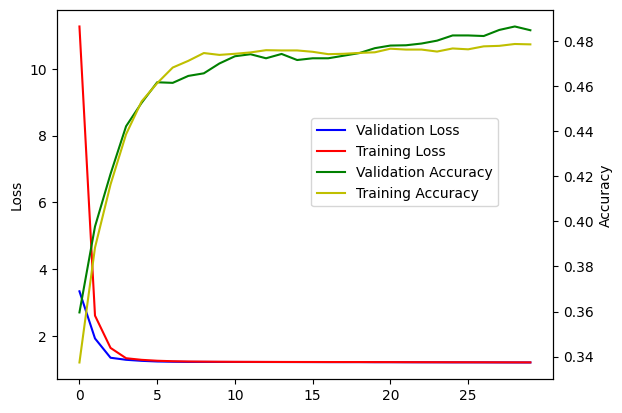

In [9]:
import matplotlib.pyplot as plt

val_loss = history_new.history["val_loss"]
trn_loss = history_new.history["loss"]
val_accuracy = history_new.history["val_accuracy"]
trn_accuracy = history_new.history["accuracy"]

fig, loss = plt.subplots()
loss.plot(range(0, epochs_new), val_loss, "b-", label="Validation Loss")
loss.plot(range(0, epochs_new), trn_loss, "r-", label="Training Loss")
loss.set_ylabel("Loss")
h1, l1 = loss.get_legend_handles_labels()

accr = loss.twinx()
accr.plot(range(0, epochs_new), val_accuracy, "g", label="Validation Accuracy")
accr.plot(range(0, epochs_new), trn_accuracy, "y", label="Training Accuracy")
accr.set_ylabel("Accuracy")
h2, l2 = accr.get_legend_handles_labels()

fig.legend(h1 + h2, l1 + l2, loc=(0.5, 0.5))

plt.xlabel("Epochs")
plt.xticks(range(0, epochs_new, 5))
plt.show()


Let's compare that with the previous run.

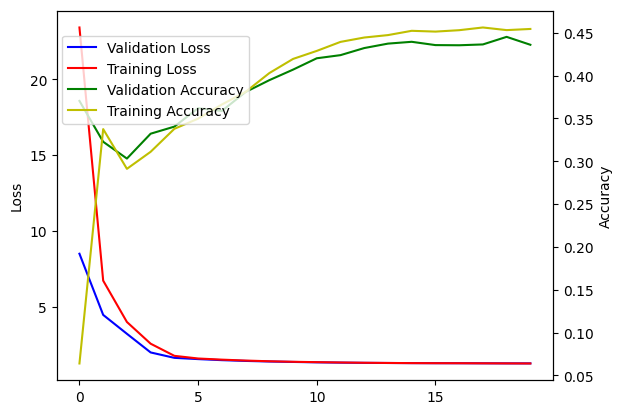

In [10]:
val_loss = history_init.history["val_loss"]
trn_loss = history_init.history["loss"]
val_accuracy = history_init.history["val_accuracy"]
trn_accuracy = history_init.history["accuracy"]

fig, loss = plt.subplots()
loss.plot(range(0, epochs_init), val_loss, "b-", label="Validation Loss")
loss.plot(range(0, epochs_init), trn_loss, "r-", label="Training Loss")
loss.set_ylabel("Loss")
h1, l1 = loss.get_legend_handles_labels()

accr = loss.twinx()
accr.plot(range(0, epochs_init), val_accuracy, "g", label="Validation Accuracy")
accr.plot(range(0, epochs_init), trn_accuracy, "y", label="Training Accuracy")
accr.set_ylabel("Accuracy")
h2, l2 = accr.get_legend_handles_labels()

fig.legend(h1 + h2, l1 + l2, loc=(0.1, 0.7))

plt.xlabel("Epochs")
plt.xticks(range(0, epochs_init, 5))
plt.show()
